In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df= pd.read_csv('insurance.csv')
df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

EDA : checking whether data is clean or not

In [4]:
df.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [5]:
df.tail()

age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603

In [6]:
df.shape

(1338, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

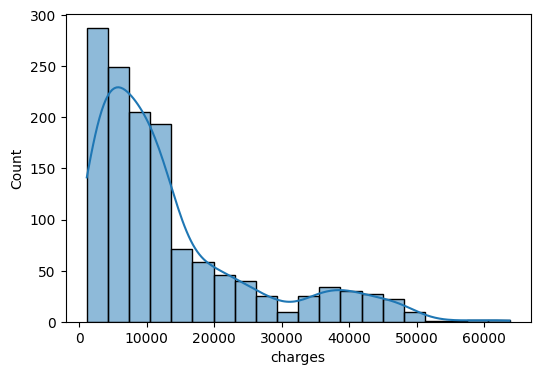

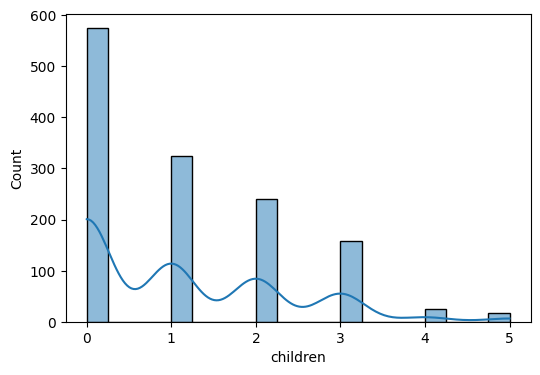

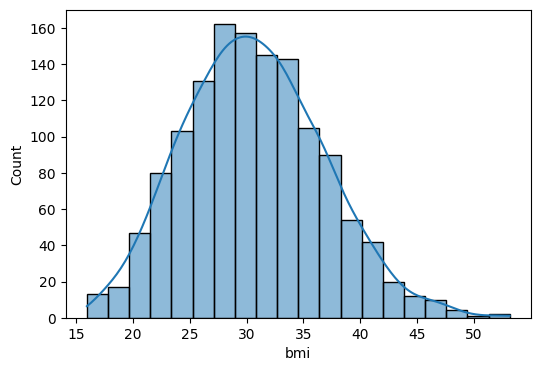

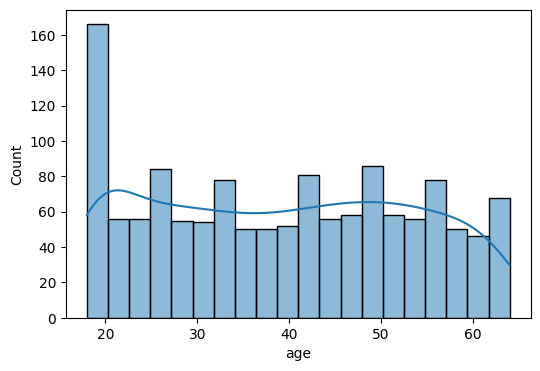

In [10]:
numeric_columns=['charges','children','bmi','age']
for i in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[i],kde=True,bins=20)

<Axes: xlabel='children', ylabel='count'>

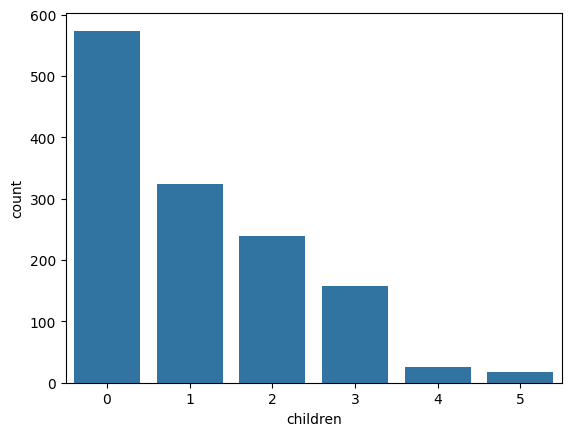

In [11]:
sns.countplot(x=df['children'])

<Axes: xlabel='sex', ylabel='count'>

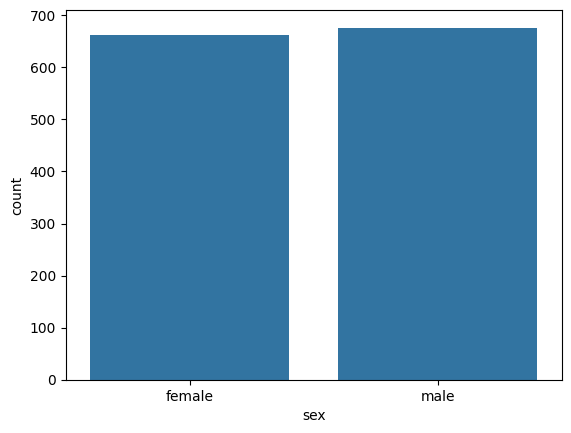

In [12]:
sns.countplot(x=df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

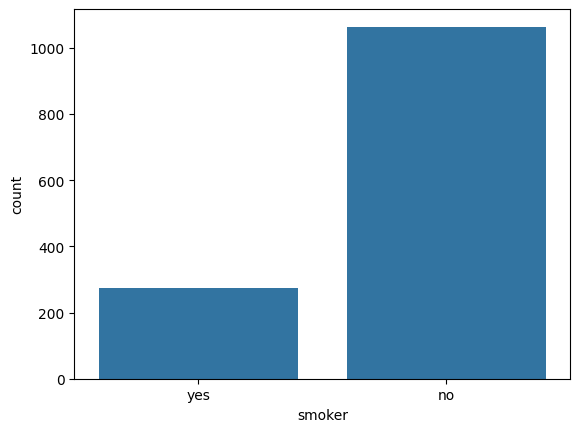

In [13]:
sns.countplot(x=df['smoker'])

<Axes: >

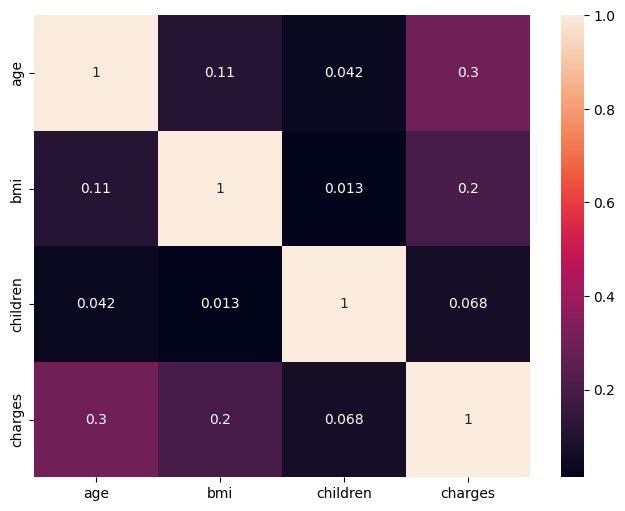

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot= True)


Data cleaning and preprocessing

In [15]:
df_cleaned = df.copy()
df_cleaned.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [16]:
df_cleaned.shape

(1338, 7)

In [17]:
df_cleaned.drop_duplicates(inplace=True)

In [18]:
df_cleaned.shape

(1337, 7)

In [19]:
df_cleaned.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [20]:
df_cleaned['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [21]:
df_cleaned['sex']=df_cleaned['sex'].map({'male' :0,"female" :1})

In [22]:
df_cleaned

age  sex     bmi  children smoker     region      charges
0      19    1  27.900         0    yes  southwest  16884.92400
1      18    0  33.770         1     no  southeast   1725.55230
2      28    0  33.000         3     no  southeast   4449.46200
3      33    0  22.705         0     no  northwest  21984.47061
4      32    0  28.880         0     no  northwest   3866.85520
...   ...  ...     ...       ...    ...        ...          ...
1333   50    0  30.970         3     no  northwest  10600.54830
1334   18    1  31.920         0     no  northeast   2205.98080
1335   18    1  36.850         0     no  southeast   1629.83350
1336   21    1  25.800         0     no  southwest   2007.94500
1337   61    1  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]

In [23]:
df_cleaned['smoker']=df_cleaned['smoker'].map({'no':0, 'yes':1})

In [24]:
df_cleaned

age  sex     bmi  children  smoker     region      charges
0      19    1  27.900         0       1  southwest  16884.92400
1      18    0  33.770         1       0  southeast   1725.55230
2      28    0  33.000         3       0  southeast   4449.46200
3      33    0  22.705         0       0  northwest  21984.47061
4      32    0  28.880         0       0  northwest   3866.85520
...   ...  ...     ...       ...     ...        ...          ...
1333   50    0  30.970         3       0  northwest  10600.54830
1334   18    1  31.920         0       0  northeast   2205.98080
1335   18    1  36.850         0       0  southeast   1629.83350
1336   21    1  25.800         0       0  southwest   2007.94500
1337   61    1  29.070         0       1  northwest  29141.36030

[1337 rows x 7 columns]

In [25]:
df_cleaned['is_female']=df_cleaned['sex']

In [26]:
df_cleaned.drop('sex', axis=1)

age     bmi  children  smoker     region      charges  is_female
0      19  27.900         0       1  southwest  16884.92400          1
1      18  33.770         1       0  southeast   1725.55230          0
2      28  33.000         3       0  southeast   4449.46200          0
3      33  22.705         0       0  northwest  21984.47061          0
4      32  28.880         0       0  northwest   3866.85520          0
...   ...     ...       ...     ...        ...          ...        ...
1333   50  30.970         3       0  northwest  10600.54830          0
1334   18  31.920         0       0  northeast   2205.98080          1
1335   18  36.850         0       0  southeast   1629.83350          1
1336   21  25.800         0       0  southwest   2007.94500          1
1337   61  29.070         0       1  northwest  29141.36030          1

[1337 rows x 7 columns]

In [27]:
df_cleaned['is_smoker']=df_cleaned['smoker']

In [28]:
df_cleaned

age  sex     bmi  children  smoker     region      charges  is_female  \
0      19    1  27.900         0       1  southwest  16884.92400          1   
1      18    0  33.770         1       0  southeast   1725.55230          0   
2      28    0  33.000         3       0  southeast   4449.46200          0   
3      33    0  22.705         0       0  northwest  21984.47061          0   
4      32    0  28.880         0       0  northwest   3866.85520          0   
...   ...  ...     ...       ...     ...        ...          ...        ...   
1333   50    0  30.970         3       0  northwest  10600.54830          0   
1334   18    1  31.920         0       0  northeast   2205.98080          1   
1335   18    1  36.850         0       0  southeast   1629.83350          1   
1336   21    1  25.800         0       0  southwest   2007.94500          1   
1337   61    1  29.070         0       1  northwest  29141.36030          1   

      is_smoker  
0             1  
1             0  
2             0  
3             0  
4             0  
...         ...  
1333          0  
1334          0  
1335          0  
1336          0  
1337          1  

[1337 rows x 9 columns]

In [29]:
df_cleaned.drop('smoker',axis=1)

age  sex     bmi  children     region      charges  is_female  is_smoker
0      19    1  27.900         0  southwest  16884.92400          1          1
1      18    0  33.770         1  southeast   1725.55230          0          0
2      28    0  33.000         3  southeast   4449.46200          0          0
3      33    0  22.705         0  northwest  21984.47061          0          0
4      32    0  28.880         0  northwest   3866.85520          0          0
...   ...  ...     ...       ...        ...          ...        ...        ...
1333   50    0  30.970         3  northwest  10600.54830          0          0
1334   18    1  31.920         0  northeast   2205.98080          1          0
1335   18    1  36.850         0  southeast   1629.83350          1          0
1336   21    1  25.800         0  southwest   2007.94500          1          0
1337   61    1  29.070         0  northwest  29141.36030          1          1

[1337 rows x 8 columns]

In [30]:
df_cleaned.head()

age  sex     bmi  children  smoker     region      charges  is_female  \
0   19    1  27.900         0       1  southwest  16884.92400          1   
1   18    0  33.770         1       0  southeast   1725.55230          0   
2   28    0  33.000         3       0  southeast   4449.46200          0   
3   33    0  22.705         0       0  northwest  21984.47061          0   
4   32    0  28.880         0       0  northwest   3866.85520          0   

   is_smoker  
0          1  
1          0  
2          0  
3          0  
4          0

In [ ]:
df['region'].value_counts()

In [32]:
df_cleaned = pd.get_dummies(df_cleaned,columns=['region'],drop_first=True)
#  one hot encoding

In [ ]:
df_cleaned.head()

In [34]:
df_cleaned=df_cleaned.astype(int)

In [ ]:
df_cleaned

In [36]:
#  Feature Engineering

In [ ]:
sns.histplot(df['bmi'])

In [38]:
df_cleaned['bmi_category']=pd.cut(df_cleaned['bmi'],bins=[0,18.5,24.9,29.5,float('inf')],labels=["underweight","normal","Oerweight","Obesity"])

In [ ]:
df_cleaned['bmi_category']

In [40]:
df_cleaned

age  sex  bmi  children  smoker  charges  is_female  is_smoker  \
0      19    1   27         0       1    16884          1          1   
1      18    0   33         1       0     1725          0          0   
2      28    0   33         3       0     4449          0          0   
3      33    0   22         0       0    21984          0          0   
4      32    0   28         0       0     3866          0          0   
...   ...  ...  ...       ...     ...      ...        ...        ...   
1333   50    0   30         3       0    10600          0          0   
1334   18    1   31         0       0     2205          1          0   
1335   18    1   36         0       0     1629          1          0   
1336   21    1   25         0       0     2007          1          0   
1337   61    1   29         0       1    29141          1          1   

      region_northwest  region_southeast  region_southwest bmi_category  
0                    0                 0                 1    Oerweight  
1                    0                 1                 0      Obesity  
2                    0                 1                 0      Obesity  
3                    1                 0                 0       normal  
4                    1                 0                 0    Oerweight  
...                ...               ...               ...          ...  
1333                 1                 0                 0      Obesity  
1334                 0                 0                 0      Obesity  
1335                 0                 1                 0      Obesity  
1336                 0                 0                 1    Oerweight  
1337                 1                 0                 0    Oerweight  

[1337 rows x 12 columns]

In [ ]:
df_cleaned.drop(['bmi','sex'], axis=1)


In [48]:
df_cleaned.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'is_female',
       'is_smoker', 'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category'],
      dtype='object')

In [50]:
df_cleaned= pd.get_dummies(df_cleaned, columns=['bmi_category'], drop_first=True)

In [52]:
df_cleaned.head()

age  sex  bmi  children  smoker  charges  is_female  is_smoker  \
0   19    1   27         0       1    16884          1          1   
1   18    0   33         1       0     1725          0          0   
2   28    0   33         3       0     4449          0          0   
3   33    0   22         0       0    21984          0          0   
4   32    0   28         0       0     3866          0          0   

   region_northwest  region_southeast  region_southwest  bmi_category_normal  \
0                 0                 0                 1                False   
1                 0                 1                 0                False   
2                 0                 1                 0                False   
3                 1                 0                 0                 True   
4                 1                 0                 0                False   

   bmi_category_Oerweight  bmi_category_Obesity  
0                    True                 False  
1                   False                  True  
2                   False                  True  
3                   False                 False  
4                    True                 False

In [55]:
df_cleaned= df_cleaned.astype(int)


In [59]:
from sklearn.preprocessing import StandardScaler
cols = ['age', 'bmi', 'children']
scalar = StandardScaler()
df_cleaned[cols] = scalar.fit_transform(df_cleaned[cols])

In [61]:
df_cleaned[cols].head()

age       bmi  children
0 -1.440418 -0.517949 -0.909234
1 -1.511647  0.462463 -0.079442
2 -0.799350  0.462463  1.580143
3 -0.443201 -1.334960 -0.909234
4 -0.514431 -0.354547 -0.909234

In [62]:
df_cleaned.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'is_female',
       'is_smoker', 'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_normal', 'bmi_category_Oerweight',
       'bmi_category_Obesity'],
      dtype='object')

feature Extraction

In [63]:
selected_feature=['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'is_female',
       'is_smoker', 'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_normal', 'bmi_category_Oerweight',
       'bmi_category_Obesity']

In [65]:
from scipy.stats import pearsonr
correlations = {
    feature: pearsonr(df_cleaned[feature], df_cleaned['charges'])[0]
    for feature in selected_feature
}
correlation_df=pd.DataFrame(list(correlations.items()), columns=['feature','Pearson Correlation'])
correlation_df.sort_values(by ='Pearson Correlation', ascending=False)

feature  Pearson Correlation
5                  charges             1.000000
4                   smoker             0.787234
7                is_smoker             0.787234
0                      age             0.298309
13    bmi_category_Obesity             0.200348
2                      bmi             0.196236
9         region_southeast             0.073577
3                 children             0.067390
8         region_northwest            -0.038695
10        region_southwest            -0.043637
1                      sex            -0.058046
6                is_female            -0.058046
11     bmi_category_normal            -0.104042
12  bmi_category_Oerweight            -0.120601

In [72]:
cat_features = [
    'is_female','is_smoker','region_northwest','region_southwest','region_southeast','bmi_category_normal','bmi_category_Oerweight','bmi_category_Obesity'
]

In [77]:

from scipy.stats import chi2_contingency
alpha = 0.05
df_cleaned['charges_bin']= pd.qcut(df_cleaned['charges'],q=4,labels=False)
chi2_results = {}

for col in cat_features:
        contingency = pd.crosstab(df_cleaned[col], df_cleaned['charges_bin'])
        chi2_stat, p_val,_,_ = chi2_contingency(contingency)
        decision = 'Reject Null (keep feature)' if p_val < alpha else 'Accept null (Drop Feature)'
        chi2_results[col]={
                'chi2_statistic': chi2_stat,
                'p_value': p_val,
                'Decision':decision
        }
chi2_df= pd.DataFrame(chi2_results).T
chi2_df=chi2_df.sort_values(by ='p_value')
chi2_df

chi2_statistic   p_value                    Decision
is_smoker                  848.219178       0.0  Reject Null (keep feature)
region_southeast            15.998167  0.001135  Reject Null (keep feature)
is_female                   10.258784   0.01649  Reject Null (keep feature)
bmi_category_Obesity         8.515711  0.036473  Reject Null (keep feature)
region_southwest             5.091893  0.165191  Accept null (Drop Feature)
bmi_category_Oerweight        4.25149  0.235557  Accept null (Drop Feature)
bmi_category_normal          3.708088   0.29476  Accept null (Drop Feature)
region_northwest              1.13424  0.768815  Accept null (Drop Feature)

In [79]:
final_df=df_cleaned[['age','is_smoker','bmi_category_Obesity','is_female','region_southeast','bmi','children','charges']]

In [80]:
final_df

age  is_smoker  bmi_category_Obesity  is_female  region_southeast  \
0    -1.440418          1                     0          1                 0   
1    -1.511647          0                     1          0                 1   
2    -0.799350          0                     1          0                 1   
3    -0.443201          0                     0          0                 0   
4    -0.514431          0                     0          0                 0   
...        ...        ...                   ...        ...               ...   
1333  0.767704          0                     1          0                 0   
1334 -1.511647          0                     1          1                 0   
1335 -1.511647          0                     1          1                 1   
1336 -1.297958          0                     0          1                 0   
1337  1.551231          1                     0          1                 0   

           bmi  children  charges  
0    -0.517949 -0.909234    16884  
1     0.462463 -0.079442     1725  
2     0.462463  1.580143     4449  
3    -1.334960 -0.909234    21984  
4    -0.354547 -0.909234     3866  
...        ...       ...      ...  
1333 -0.027743  1.580143    10600  
1334  0.135659 -0.909234     2205  
1335  0.952670 -0.909234     1629  
1336 -0.844753 -0.909234     2007  
1337 -0.191145 -0.909234    29141  

[1337 rows x 8 columns]